# Ερώτημα 1

Data Preprocess

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, Birch, KMeans

csv_file = "data.csv"
chunksize = 10**5  
total_rows = 0
total_columns = None
clean_chunks = []

for chunk in pd.read_csv(csv_file, chunksize=chunksize):
    
    rows_before = len(chunk)

    # replace NaN values with zeros 
    chunk = chunk.fillna(0)

    # remove duplicates
    chunk = chunk.drop_duplicates()

   
    clean_chunks.append(chunk)
    total_rows += len(chunk)

    if total_columns is None:
        total_columns = chunk.columns

# combine chunks in DataFrame
df_clean = pd.concat(clean_chunks, ignore_index=True)


print("Total Row number:", total_rows)
print("Total column number:", len(total_columns))
print("Column names:")
for col in total_columns:
    print(col)


# store in a new CSV
df_clean.to_csv("clean_data.csv", index=False)



Total Row number: 8655625
Total column number: 86
Column names:
Flow ID
Src IP
Src Port
Dst IP
Dst Port
Protocol
Timestamp
Flow Duration
Total Fwd Packet
Total Bwd packets
Total Length of Fwd Packet
Total Length of Bwd Packet
Fwd Packet Length Max
Fwd Packet Length Min
Fwd Packet Length Mean
Fwd Packet Length Std
Bwd Packet Length Max
Bwd Packet Length Min
Bwd Packet Length Mean
Bwd Packet Length Std
Flow Bytes/s
Flow Packets/s
Flow IAT Mean
Flow IAT Std
Flow IAT Max
Flow IAT Min
Fwd IAT Total
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Max
Fwd IAT Min
Bwd IAT Total
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Max
Bwd IAT Min
Fwd PSH Flags
Bwd PSH Flags
Fwd URG Flags
Bwd URG Flags
Fwd Header Length
Bwd Header Length
Fwd Packets/s
Bwd Packets/s
Packet Length Min
Packet Length Max
Packet Length Mean
Packet Length Std
Packet Length Variance
FIN Flag Count
SYN Flag Count
RST Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
CWR Flag Count
ECE Flag Count
Down/Up Ratio
Average Packet Size
Fwd Segment Size Av

Split Columns

In [2]:

csv_file = "clean_data.csv"

# Numeric vs Categorical Columns
df_sample = pd.read_csv("clean_data.csv", nrows=10000)

# Numerical
numeric_cols = df_sample.select_dtypes(include=["int64", "float64"]).columns

# Categorical
categorical_cols = df_sample.select_dtypes(exclude=["int64", "float64"]).columns

# Store to csv files
pd.DataFrame({"Numeric Columns": numeric_cols}).to_csv("numeric_columns.csv", index=False)
pd.DataFrame({"Categorical Columns": categorical_cols}).to_csv("categorical_columns.csv", index=False)

print("Total Columns:", len(df_sample.columns))
print("Numerical Columns:", len(numeric_cols))
print("Categorical columns:", len(categorical_cols))


Total Columns: 86
Numerical Columns: 79
Categorical columns: 7


Statistics

In [11]:
csv_file = "clean_data.csv"
chunksize = 10**5  
pd.set_option("display.float_format", "{:.4f}".format)


df = pd.read_csv("clean_data.csv", nrows=50000)

# Numeric Statistics
def statisticsNumeric(df):
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
    df_columns = ['column', 'mean', 'variance', 'skewness', 'kurtosis']
    statistics = pd.DataFrame(columns=df_columns)

 #Calculate Mean,Variance,Skew,Kurtosis
    for col in numeric_cols:
        mean = round(df[col].mean(),4)
        var = round(df[col].var(),4)
        skew = round(df[col].skew(),4)
        kurt = round(df[col].kurt(),4)
        statistics.loc[len(statistics.index)] = [col, mean, var, skew, kurt]

    return statistics

numeric_stats_df = statisticsNumeric(df)
print("\n Numeric Statistics:")
print(numeric_stats_df)

numeric_stats_df.to_csv("numeric_stats.csv", index=False)




# Categorical Statistics
def statisticsCategorical(df):
    categorical_cols = df.select_dtypes(exclude=["int64", "float64"]).columns
    results = []
 
 # Calculate Most Frequent value in each column and count them 
    for col in categorical_cols:
        most_freq = df[col].mode()[0]                 
        freq_count = df[col].value_counts().iloc[0]   
        results.append({
            "column": col,
            "most_frequent_value": most_freq,
            "count": freq_count
        })
    
    return pd.DataFrame(results)

categorical_stats_df = statisticsCategorical(df)
print("\n Categorical Statistics:")
print(categorical_stats_df)

categorical_stats_df.to_csv("categorical_stats.csv", index=False)


 Numeric Statistics:
              column          mean             variance  skewness   kurtosis
0           Src Port    40755.1214       258128734.4783   -1.0666     0.4344
1           Dst Port     1060.8523        51734112.2127    7.0795    49.7754
2           Protocol       14.0919              23.6550   -1.0809    -0.8097
3      Flow Duration 19123677.2180 637101024026141.3750    1.2596     0.7037
4   Total Fwd Packet       27.0342         2009894.1342  218.2967 48412.5306
..               ...           ...                  ...       ...        ...
74        Active Min   873723.9986   4076737404256.6016   10.5814   322.5675
75         Idle Mean  5142602.4852  47430921232744.1719    1.8217    10.8368
76          Idle Std  1517609.2367  10532462941222.5117    3.8929    35.1515
77          Idle Max  6932076.1775  94328845037341.7188    1.7029     5.3097
78          Idle Min  3859498.1819  31499707494238.1328    2.9933    27.1483

[79 rows x 5 columns]

 Categorical Statistics:
     

Graphs

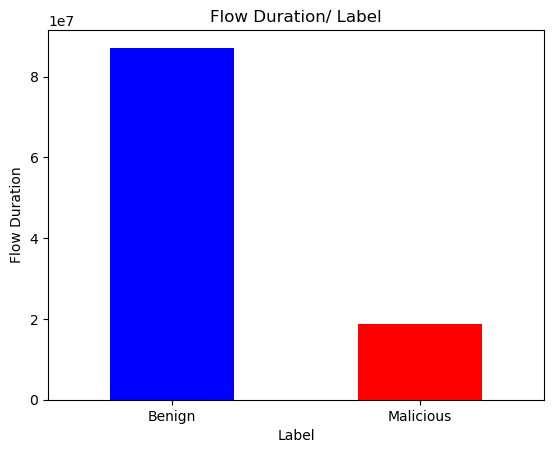

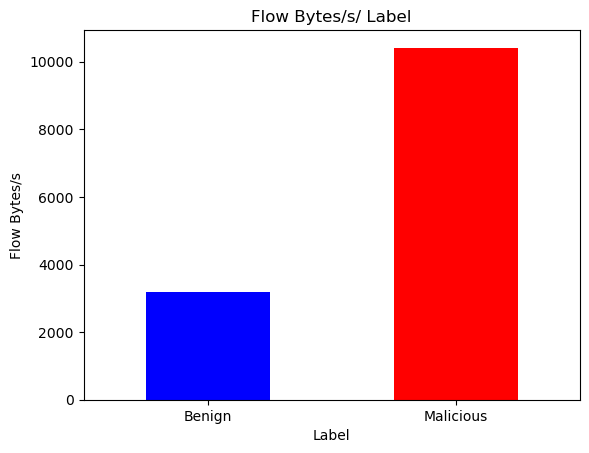

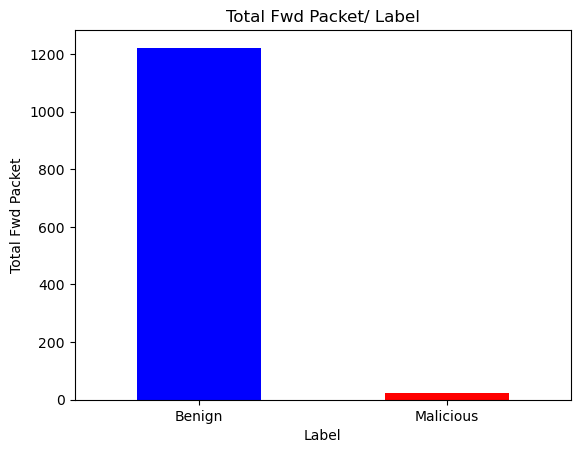

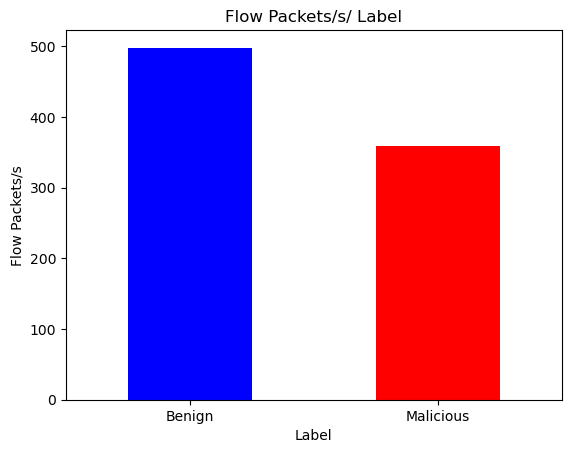

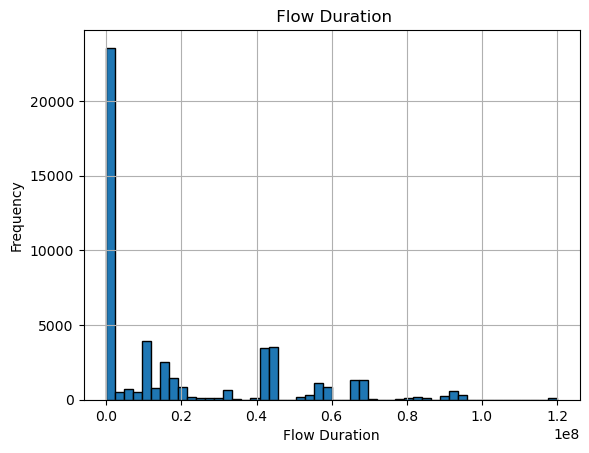

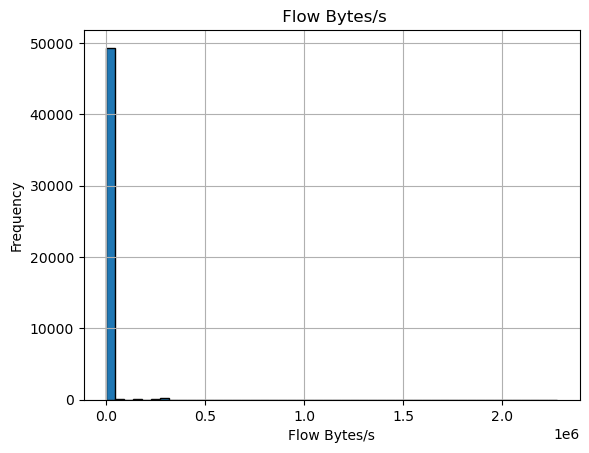

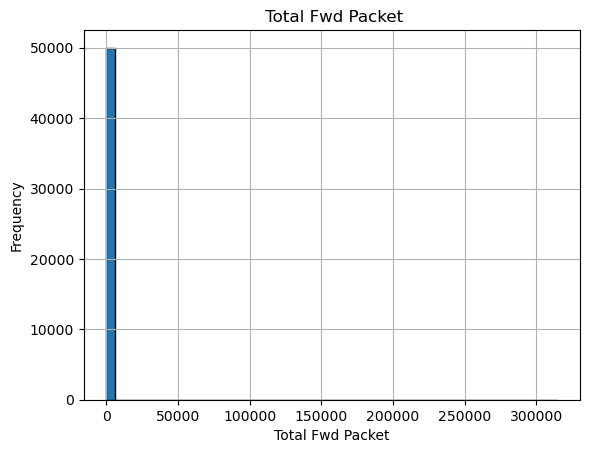

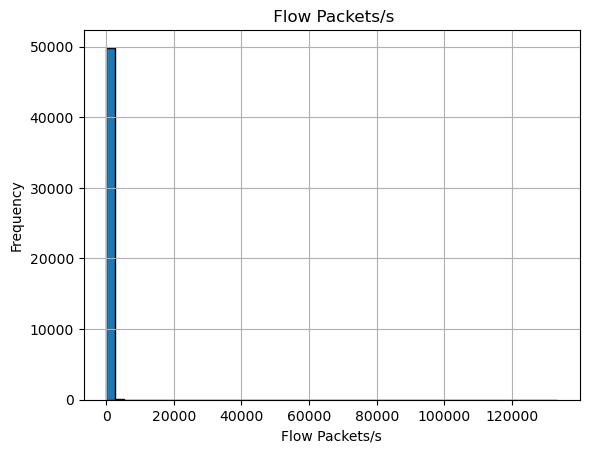

In [12]:

# Comparison between Benign/Malicious
cols_to_plot = ["Flow Duration", "Flow Bytes/s", "Total Fwd Packet","Flow Packets/s"] 
                
for col in cols_to_plot:
    mean_values = df.groupby("Label")[col].mean()
    mean_values.plot(kind="bar", color=["blue", "red"])
    plt.title(f"{col}/ Label")
    plt.xlabel("Label")
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.show()


cols = ["Flow Duration", "Flow Bytes/s", "Total Fwd Packet","Flow Packets/s"]

for col in cols:
    df[col].hist(bins=50, edgecolor="black")
    plt.title(f" {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Heatmap

                  Src Port  Dst Port  Protocol  Flow Duration  \
Src Port            1.0000   -0.2787   -0.1084        -0.6032   
Dst Port           -0.2787    1.0000   -0.2258        -0.0051   
Protocol           -0.1084   -0.2258    1.0000         0.2202   
Flow Duration      -0.6032   -0.0051    0.2202         1.0000   
Total Fwd Packet   -0.0079    0.0324   -0.0323         0.0176   
...                    ...       ...       ...            ...   
Active Min         -0.2635    0.0247    0.2262         0.5998   
Idle Mean          -0.3328   -0.0934    0.1894         0.7091   
Idle Std           -0.4471   -0.0688    0.2572         0.7317   
Idle Max           -0.4622   -0.0933    0.2380         0.8252   
Idle Min           -0.1791   -0.0809    0.1050         0.5101   

                  Total Fwd Packet  Total Bwd packets  \
Src Port                   -0.0079             0.0039   
Dst Port                    0.0324             0.1247   
Protocol                   -0.0323            -0

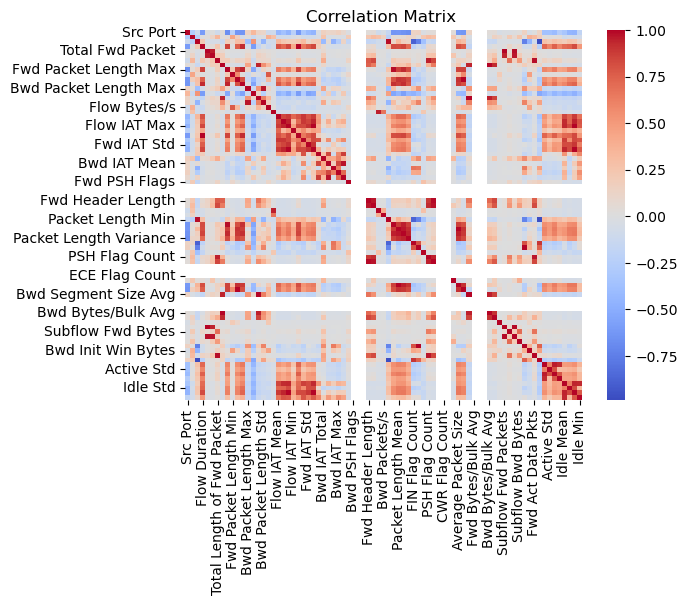


Highly correlated pairs (>|0.9|):
- Protocol ↔ Packet Length Min (corr = 0.98)
- Protocol ↔ Fwd Seg Size Min (corr = -0.99)
- Flow Duration ↔ Fwd Packet Length Std (corr = 0.92)
- Flow Duration ↔ Fwd IAT Total (corr = 1.00)
- Total Fwd Packet ↔ Total Bwd packets (corr = 0.96)
- Total Fwd Packet ↔ Subflow Fwd Packets (corr = 0.99)
- Total Fwd Packet ↔ Subflow Bwd Packets (corr = 0.98)
- Total Bwd packets ↔ Subflow Fwd Packets (corr = 0.94)
- Total Bwd packets ↔ Subflow Bwd Packets (corr = 0.96)
- Total Length of Fwd Packet ↔ PSH Flag Count (corr = 0.95)
- Total Length of Fwd Packet ↔ Fwd Act Data Pkts (corr = 0.98)
- Total Length of Bwd Packet ↔ Bwd Packet Length Mean (corr = 0.94)
- Total Length of Bwd Packet ↔ Bwd Segment Size Avg (corr = 0.94)
- Total Length of Bwd Packet ↔ Bwd Bytes/Bulk Avg (corr = 0.99)
- Total Length of Bwd Packet ↔ Bwd Packet/Bulk Avg (corr = 0.93)
- Fwd Packet Length Max ↔ Fwd Packet Length Std (corr = 0.94)
- Fwd Packet Length Max ↔ Packet Length Max (corr = 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = pd.read_csv("numeric_columns.csv")["Numeric Columns"].tolist()
df_numeric = df[numeric_cols]

# Corellation matrix
corr_matrix = df_numeric.corr()
print(corr_matrix)


sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix ")     #only in numeric columns
plt.show()

# Pairs with correlation >0.9
threshold = 0.9
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_val))

print("\nHighly correlated pairs (>|0.9|):")
for col1, col2, corr_val in high_corr_pairs:
    print(f"- {col1} ↔ {col2} (corr = {corr_val:.2f})")



# Ερώτημα 2

Drop columns

In [15]:

csv_file = "clean_data.csv"
chunksize = 10**5 

keep_cols = [
    "Flow Duration", "Total Fwd Packet", "Total Bwd packets", "Total Length of Fwd Packet",
    "Total Length of Bwd Packet", "Flow Bytes/s", "Flow Packets/s",
    "Packet Length Mean", "Active Mean", "Active Std",
    "Idle Mean", "Idle Std", "Subflow Fwd Bytes", "Subflow Bwd Bytes",
    "Label", "Traffic Type", "Traffic Subtype"
]

cleaned_chunks=[]
for chunk in pd.read_csv(csv_file, chunksize=chunksize, usecols=keep_cols):
 
    cleaned_chunks.append(chunk)


df_final = pd.concat(cleaned_chunks, ignore_index=True)
df_final.to_csv("column_clean_data.csv",index=False)

print("Rows:",df_final.shape)
print("Final Columns:")
for col in df_final.columns:
    print(col)

Rows: (8655625, 17)
Final Columns:
Flow Duration
Total Fwd Packet
Total Bwd packets
Total Length of Fwd Packet
Total Length of Bwd Packet
Flow Bytes/s
Flow Packets/s
Packet Length Mean
Subflow Fwd Bytes
Subflow Bwd Bytes
Active Mean
Active Std
Idle Mean
Idle Std
Label
Traffic Type
Traffic Subtype


Drop Rows

In [16]:
# with sample

csv_file = "column_clean_data.csv"
output_file = "sampled_data.csv"

chunksize = 100_000  

target_malicious = 2500

benign_chunks = []
malicious_sampled = []
malicious_collected = 0

for chunk in pd.read_csv(csv_file, chunksize=chunksize):
   
    benign = chunk[chunk["Label"] == "Benign"]
    if not benign.empty:
        benign_chunks.append(benign)

    
    if malicious_collected < target_malicious:
        malicious = chunk[chunk["Label"] == "Malicious"]
        remaining = target_malicious - malicious_collected
        if not malicious.empty:
            if len(malicious) > remaining:
                sampled = malicious.sample(n=remaining, random_state=42)
                malicious_sampled.append(sampled)
                malicious_collected += len(sampled)
            else:
                malicious_sampled.append(malicious)
                malicious_collected += len(malicious)


df_final = pd.concat(benign_chunks + malicious_sampled, ignore_index=True)


df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)


df_final.to_csv(output_file, index=False)


print("Total Rows:")
print(df_final["Label"].value_counts())


Total Rows:
Label
Malicious    2500
Benign       1301
Name: count, dtype: int64


Clustering

1186 rows


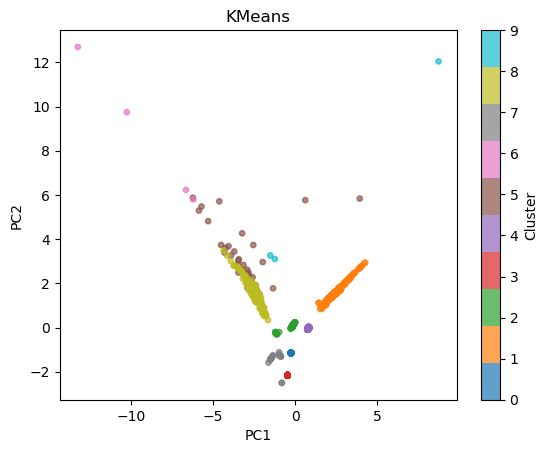

In [18]:
# K-Means

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

df = pd.read_csv("column_clean_data.csv")

numeric_cols = pd.read_csv("numeric_columns.csv")["Numeric Columns"].tolist()
numeric_cols = [col for col in numeric_cols if col in df.columns]
df_num = df[numeric_cols]

# Normalizing 
scaler = StandardScaler()
X = scaler.fit_transform(df_num)


k = 10   # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X)

# Take samples- 200 nearest values
samples_per_cluster = 200
reduced_data = []

for cluster_id in range(kmeans.n_clusters):
    cluster_points = df_num[df["KMeans_Cluster"] == cluster_id]
    centroid = kmeans.cluster_centers_[cluster_id].reshape(1, -1)
    _, distances = pairwise_distances_argmin_min(cluster_points, centroid)
    closest_idx = np.argsort(distances)[:samples_per_cluster]

    reduced_cluster = cluster_points.iloc[closest_idx].copy()
    reduced_cluster["Label"] = df.loc[cluster_points.index[closest_idx], "Label"].values
    reduced_cluster["Traffic Type"] = df.loc[cluster_points.index[closest_idx], "Traffic Type"].values
    reduced_cluster["Cluster"] = cluster_id

    reduced_data.append(reduced_cluster)

df_reduced = pd.concat(reduced_data, ignore_index=True)


output_file = "kmeans_data.csv"
df_reduced.to_csv(output_file, index=False)
print(f"{len(df_reduced)} rows")


#  PCA for better view
scaler_red = StandardScaler()
X_reduced_scaled = scaler_red.fit_transform(df_reduced[numeric_cols])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=df_reduced["Cluster"], cmap="tab10", s=15, alpha=0.7)
plt.title("KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster")
plt.show()



 Subclusters created: 1035
1035 rows


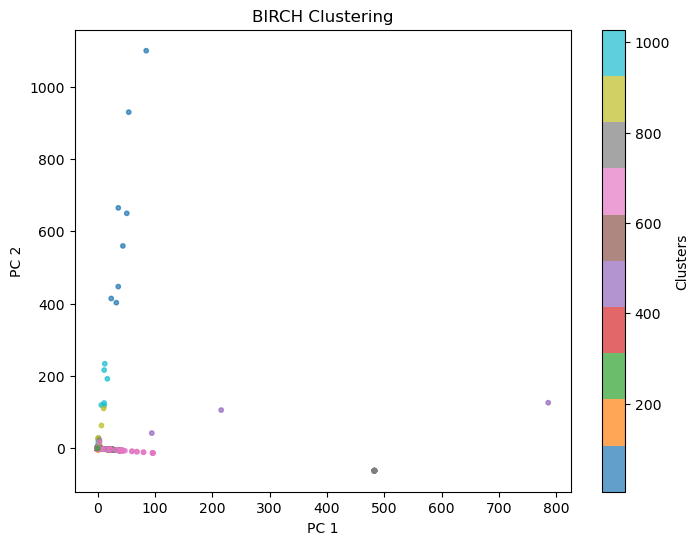

In [20]:
# Βirch clustering

from sklearn.cluster import Birch


csv_file = "column_clean_data.csv"
chunksize = 20000  

scaler = StandardScaler()
pca = PCA(n_components=10)   
birch = Birch(threshold=1.5, n_clusters=None)

first_chunk = True
sample_for_plot = []

all_labels = []
all_traffic = []
all_subclusters = []

for chunk in pd.read_csv(csv_file, chunksize=chunksize):
    
    numeric_cols = chunk.select_dtypes(include=["int64", "float64"]).columns.tolist()
    if "Label" in chunk.columns:
        labels_chunk = chunk["Label"].values
    else:
        labels_chunk = None
    if "Traffic Type" in chunk.columns:
        traffic_chunk = chunk["Traffic Type"].values
    else:
        traffic_chunk = None

    num_chunk = chunk[numeric_cols]
    if num_chunk.empty:
        continue

   
    if first_chunk:
        X_scaled = scaler.fit_transform(num_chunk)
        X_reduced = pca.fit_transform(X_scaled)  
        first_chunk = False
    else:
        X_scaled = scaler.transform(num_chunk)
        X_reduced = pca.transform(X_scaled)      

    
    birch.partial_fit(X_reduced)

    
    preds = birch.predict(X_reduced)

    all_subclusters.extend(preds)
    if labels_chunk is not None:
        all_labels.extend(labels_chunk)
    if traffic_chunk is not None:
        all_traffic.extend(traffic_chunk)

    
    sample_for_plot.append(pd.DataFrame(X_reduced).sample(n=1000, random_state=42))


print(" Subclusters created:", len(birch.subcluster_centers_))


df_map = pd.DataFrame({
    "Subcluster": all_subclusters,
    "Label": all_labels,
    "Traffic Type": all_traffic
})

majority_labels = df_map.groupby("Subcluster")["Label"].agg(lambda x: x.value_counts().idxmax()).astype(str)
majority_traffic = df_map.groupby("Subcluster")["Traffic Type"].agg(lambda x: x.value_counts().idxmax()).astype(str)


subclusters = pd.DataFrame(birch.subcluster_centers_)
subclusters["Label"] = subclusters.index.map(majority_labels)
subclusters["Traffic Type"] = subclusters.index.map(majority_traffic)

output_file = "birch_reduced_data.csv"
subclusters.to_csv(output_file, index=False)


print(f"{len(subclusters)} rows")

X_vis = pd.concat(sample_for_plot, ignore_index=True)
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_vis)

labels = birch.predict(X_vis)

plt.figure(figsize=(8,6))
plt.scatter(X_pca_vis[:,0], X_pca_vis[:,1], c=labels, cmap="tab10", s=10, alpha=0.7)
plt.title("BIRCH Clustering")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label="Clusters")
plt.show()



# Ερώτημα 3

Label Column

In [ ]:
# sampled_data

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


df = pd.read_csv("sampled_data.csv")   

# Split into X and labels Y
X = df.select_dtypes(include=[np.number])  
y = df["Label"]

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label Normal/Malicious into 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)


#  Train Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# SVM Classifier

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM-Label")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


# Neural Network (MLP)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network-Label")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))




SVM-Label
              precision    recall  f1-score   support

      Benign       0.99      0.68      0.81       260
   Malicious       0.86      1.00      0.92       501

    accuracy                           0.89       761
   macro avg       0.92      0.84      0.87       761
weighted avg       0.90      0.89      0.88       761

Neural Network-Label
              precision    recall  f1-score   support

      Benign       0.96      0.92      0.94       260
   Malicious       0.96      0.98      0.97       501

    accuracy                           0.96       761
   macro avg       0.96      0.95      0.95       761
weighted avg       0.96      0.96      0.96       761



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
#kmeans clustered data


df = pd.read_csv("kmeans_reduced_data.csv")   

# Split into X and labels Y
X = df.select_dtypes(include=[np.number])   
y = df["Label"]

# Normaliza Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lable Normal/Malicious into 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

#  SVM Classifier

svm_model = SVC(kernel="rbf",  class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(" SVM-Label")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


# Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network-Label")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

 SVM-Label
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        35
   Malicious       1.00      1.00      1.00       203

    accuracy                           1.00       238
   macro avg       0.99      1.00      0.99       238
weighted avg       1.00      1.00      1.00       238

Neural Network-Label
              precision    recall  f1-score   support

      Benign       1.00      0.97      0.99        35
   Malicious       1.00      1.00      1.00       203

    accuracy                           1.00       238
   macro avg       1.00      0.99      0.99       238
weighted avg       1.00      1.00      1.00       238



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# birch clustered data

df = pd.read_csv("birch_reduced_data.csv")   
df = df.dropna(subset=["Label"])

# Split into X and labels Y
X = df.select_dtypes(include=[np.number])   
y = df["Label"]

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label Benign/Malicious into 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# SVM Classifier
svm_model = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM-Label")
print(classification_report(y_test, y_pred_svm, target_names=[str(c) for c in le.classes_]))


# Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network-Label")
print(classification_report(y_test, y_pred_mlp, target_names=[str(c) for c in le.classes_]))


SVM-Label
              precision    recall  f1-score   support

      Benign       0.78      0.76      0.77        37
   Malicious       0.93      0.94      0.93       128

    accuracy                           0.90       165
   macro avg       0.85      0.85      0.85       165
weighted avg       0.90      0.90      0.90       165

Neural Network-Label
              precision    recall  f1-score   support

      Benign       0.88      0.76      0.81        37
   Malicious       0.93      0.97      0.95       128

    accuracy                           0.92       165
   macro avg       0.90      0.86      0.88       165
weighted avg       0.92      0.92      0.92       165



Traffic type column

In [ ]:
#sample data


df = pd.read_csv("sampled_data.csv")   

# Split into X and label Y
X = df.select_dtypes(include=[np.number])  
y = df["Traffic Type"]

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label Normal/Malicious into 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# SVM Classifier

svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM-Traffic type")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


# Neural Network (MLP)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network-Traffic type")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

SVM-Traffic type
              precision    recall  f1-score   support

       Audio       0.95      0.53      0.68        38
  Background       0.00      0.00      0.00         6
  Bruteforce       0.75      0.99      0.85       180
         DoS       1.00      0.99      1.00       321
        Text       0.79      0.55      0.65        42
       Video       0.86      0.75      0.80       174

    accuracy                           0.88       761
   macro avg       0.73      0.64      0.66       761
weighted avg       0.89      0.88      0.88       761



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Neural Network-Traffic type
              precision    recall  f1-score   support

       Audio       0.96      0.63      0.76        38
  Background       0.00      0.00      0.00         6
  Bruteforce       0.92      0.87      0.89       180
         DoS       1.00      0.99      1.00       321
        Text       0.80      0.67      0.73        42
       Video       0.79      0.97      0.87       174

    accuracy                           0.91       761
   macro avg       0.75      0.69      0.71       761
weighted avg       0.91      0.91      0.91       761



c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-def

In [35]:
#kmeans clustered data


df = pd.read_csv("kmeans_reduced_data.csv")  

# Split into X and label Y
X = df.select_dtypes(include=[np.number])  
y = df["Traffic Type"]

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label Normal/Malicious into 0/1
le = LabelEncoder()
y_enc = le.fit_transform(y)



X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# SVM Classifier

svm_model = SVC(kernel="rbf",  class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM-Traffic type")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


# Neural Network (MLP)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network -traffic type")
print(classification_report(y_test, y_pred_mlp, target_names=le.classes_))

SVM-Traffic type
                       precision    recall  f1-score   support

           Bruteforce       0.07      0.75      0.13         4
                  DoS       0.93      0.39      0.55       164
Information Gathering       0.02      1.00      0.05         2
                Mirai       1.00      0.15      0.26        33
                Video       1.00      1.00      1.00        35

             accuracy                           0.46       238
            macro avg       0.60      0.66      0.40       238
         weighted avg       0.93      0.46      0.56       238

Neural Network -traffic type
                       precision    recall  f1-score   support

           Bruteforce       0.00      0.00      0.00         4
                  DoS       0.92      0.90      0.91       164
Information Gathering       0.00      0.00      0.00         2
                Mirai       0.56      0.73      0.63        33
                Video       1.00      0.97      0.99        35

    

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defi

In [36]:
# birch clustered data


df = pd.read_csv("birch_reduced_data.csv")   

# Filter on traffic types with less than  2 samples
counts = df["Traffic Type"].value_counts()
valid_types = counts[counts > 1].index
df = df[df["Traffic Type"].isin(valid_types)]

# Split X and labels Y
X = df.select_dtypes(include=[np.number])  
y = df["Traffic Type"]

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Κωδικοποίηση των labels (Traffic Types → αριθμοί)
le = LabelEncoder()
y_enc = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# SVM Classifier

svm_model = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM-Traffic Type")
print(classification_report(y_test, y_pred_svm, target_names=[str(c) for c in le.classes_]))


# Neural Network (MLP)

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("Neural Network-Traffic Type")
print(classification_report(y_test, y_pred_mlp, target_names=[str(c) for c in le.classes_], zero_division=0))



SVM-Traffic Type
                       precision    recall  f1-score   support

                Audio       0.60      1.00      0.75         6
           Bruteforce       0.00      0.00      0.00         1
                  DoS       0.95      0.50      0.66       103
Information Gathering       0.09      0.83      0.17         6
                Mirai       0.78      0.39      0.52        18
                 Text       0.40      0.75      0.52         8
                Video       0.93      0.61      0.74        23

             accuracy                           0.55       165
            macro avg       0.54      0.58      0.48       165
         weighted avg       0.85      0.55      0.63       165

Neural Network-Traffic Type
                       precision    recall  f1-score   support

                Audio       0.60      1.00      0.75         6
           Bruteforce       0.00      0.00      0.00         1
                  DoS       0.85      0.96      0.90       103
Inform

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
